<a href="https://colab.research.google.com/github/purvadanait/mini-projects/blob/main/EDA_on_Climate_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/updated_climate_data_1970_2000.csv')
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
             city_name  latitude  longitude  elevation  mean_tavg  tavg_01  \
0         les Escaldes     42.51       1.53       1111   8.766667      1.1   
1     Andorra la Vella     42.51       1.52       1275   8.100000      0.5   
2              Warīsān     25.17      55.41         13  27.516668     18.7   
3   Umm Al Quwain City     25.56      55.56          4  26.941666     18.6   
4  Ras Al Khaimah City     25.79      55.94          2  27.391668     19.0   

   tavg_02  tavg_03  tavg_04  tavg_05  ...  tmax_03  tmax_04  tmax_05  \
0      2.2      4.3      6.2     10.2  ...      9.2     11.2     15.3   
1      1.6      3.5      5.4      9.4  ...      8.3     10.4     14.5   
2     20.0     22.8     26.9     31.1  ...     29.1     33.9     38.6   
3     19.6     22.3     26.0     30.1  ...     27.4     31.7     36.1   
4     20.1     22.7     26.8     31.0

<Axes: >

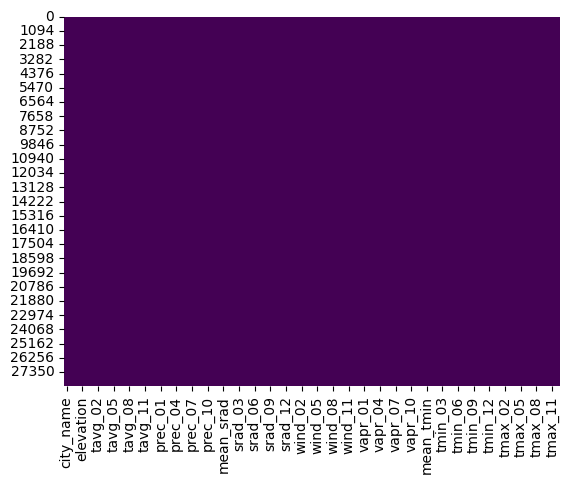

In [18]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [25]:
#reducing dataset to important columns
data = df.drop(['tavg_01', 'tavg_02', 'tavg_03', 'tavg_04', 'tavg_05', 'tavg_06', 'tavg_07', 'tavg_08', 'tavg_09', 'tavg_10', 'tavg_11', 'tavg_12',
                'prec_01', 'prec_02', 'prec_03', 'prec_04', 'prec_05', 'prec_06', 'prec_07', 'prec_08', 'prec_09', 'prec_10', 'prec_11', 'prec_12',
                'srad_01', 'srad_02', 'srad_03', 'srad_04', 'srad_05', 'srad_06', 'srad_07', 'srad_08', 'srad_09', 'srad_10', 'srad_11', 'srad_12',
                'wind_01', 'wind_02', 'wind_03', 'wind_04', 'wind_05', 'wind_06', 'wind_07', 'wind_08', 'wind_09', 'wind_10', 'wind_11', 'wind_12',
                'vapr_01', 'vapr_02', 'vapr_03', 'vapr_04', 'vapr_05', 'vapr_06', 'vapr_07', 'vapr_08', 'vapr_09', 'vapr_10', 'vapr_11', 'vapr_12',
                'tmin_01', 'tmin_02', 'tmin_03', 'tmin_04', 'tmin_05', 'tmin_06', 'tmin_07', 'tmin_08', 'tmin_09', 'tmin_10', 'tmin_11', 'tmin_12',
                'tmax_01', 'tmax_02', 'tmax_03', 'tmax_04', 'tmax_05', 'tmax_06', 'tmax_07', 'tmax_08', 'tmax_09', 'tmax_10', 'tmax_11', 'tmax_12'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28438 entries, 0 to 28437
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city_name  28438 non-null  object 
 1   latitude   28438 non-null  float64
 2   longitude  28438 non-null  float64
 3   elevation  28438 non-null  int64  
 4   mean_tavg  28438 non-null  float64
 5   mean_prec  28438 non-null  float64
 6   mean_srad  28438 non-null  float64
 7   mean_wind  28438 non-null  float64
 8   mean_vapr  28438 non-null  float64
 9   mean_tmin  28438 non-null  float64
 10  mean_tmax  28438 non-null  float64
dtypes: float64(9), int64(1), object(1)
memory usage: 2.4+ MB


In [26]:
#separating categorical variable columns
cat_cols=data.select_dtypes(include=['object']).columns
print(cat_cols)
#numerical variable columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print(num_cols)

Index(['city_name'], dtype='object')
['latitude', 'longitude', 'elevation', 'mean_tavg', 'mean_prec', 'mean_srad', 'mean_wind', 'mean_vapr', 'mean_tmin', 'mean_tmax']


latitude
Skew : -0.97


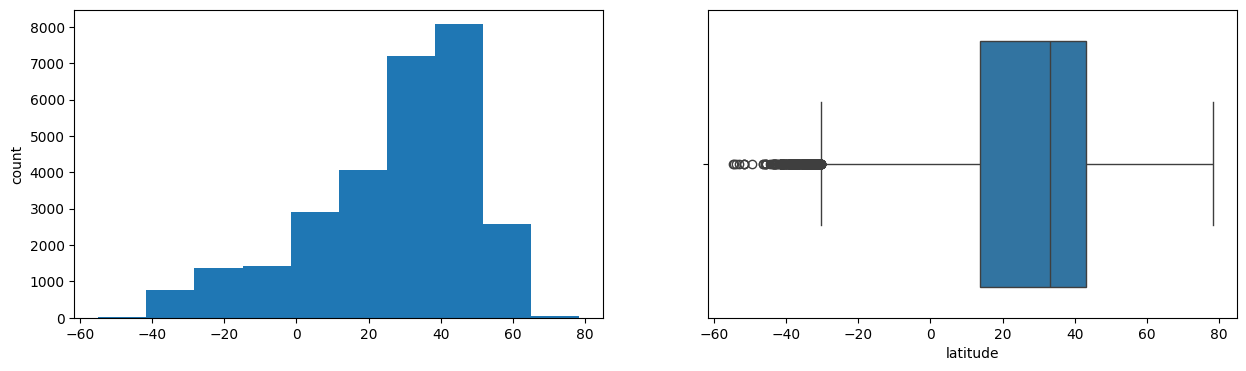

longitude
Skew : -0.14


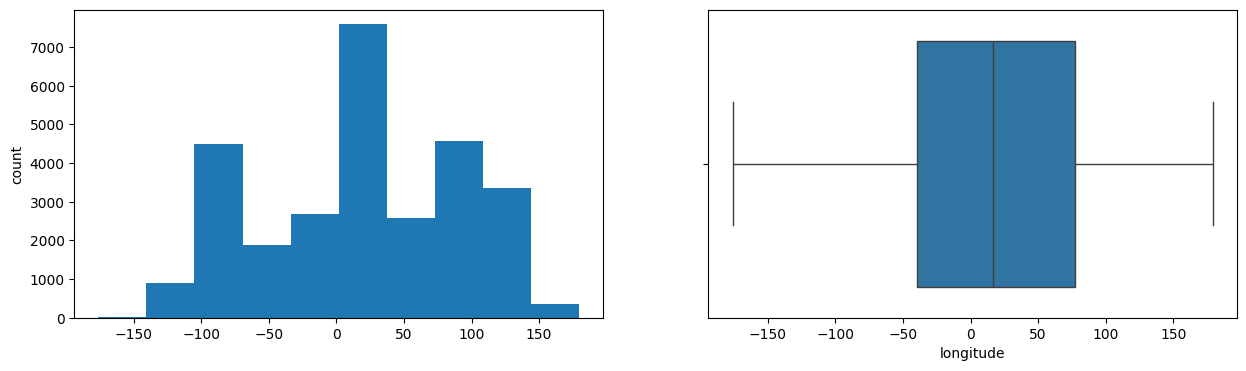

elevation
Skew : -9.14


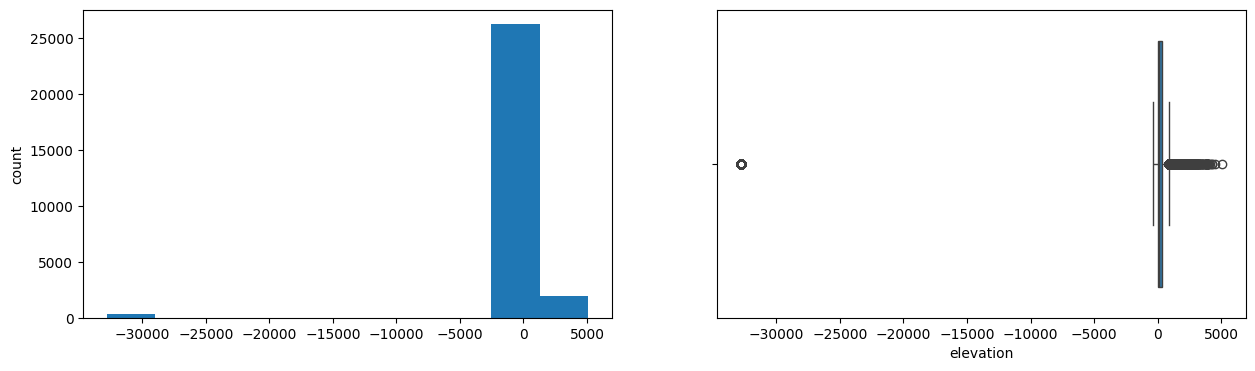

mean_tavg
Skew : -0.08


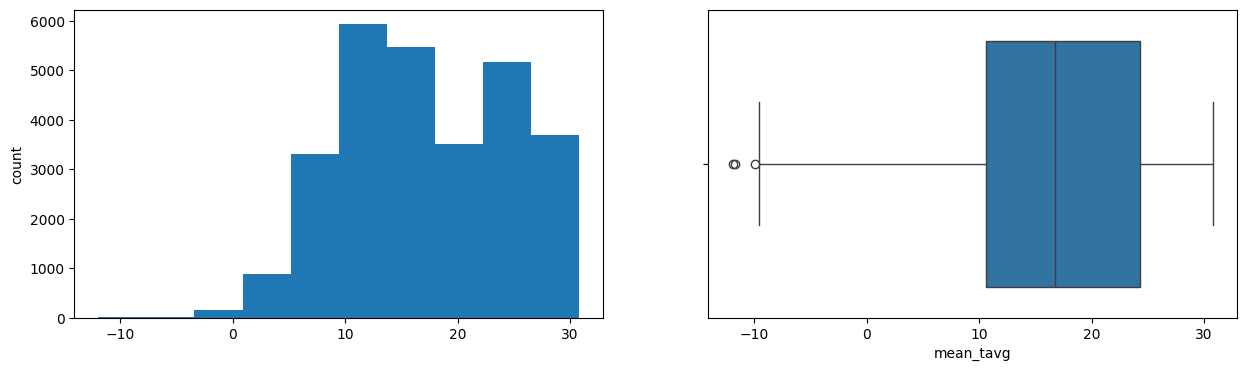

mean_prec
Skew : -9.43


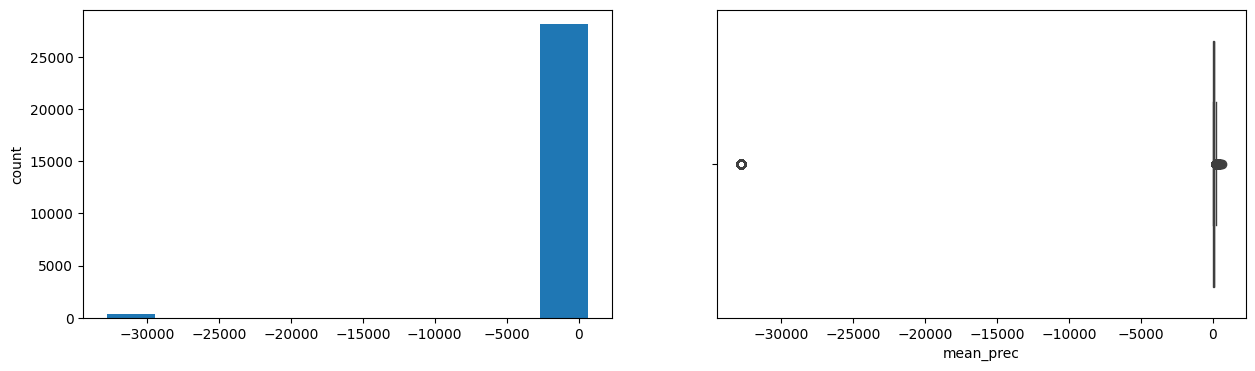

mean_srad
Skew : 5.66


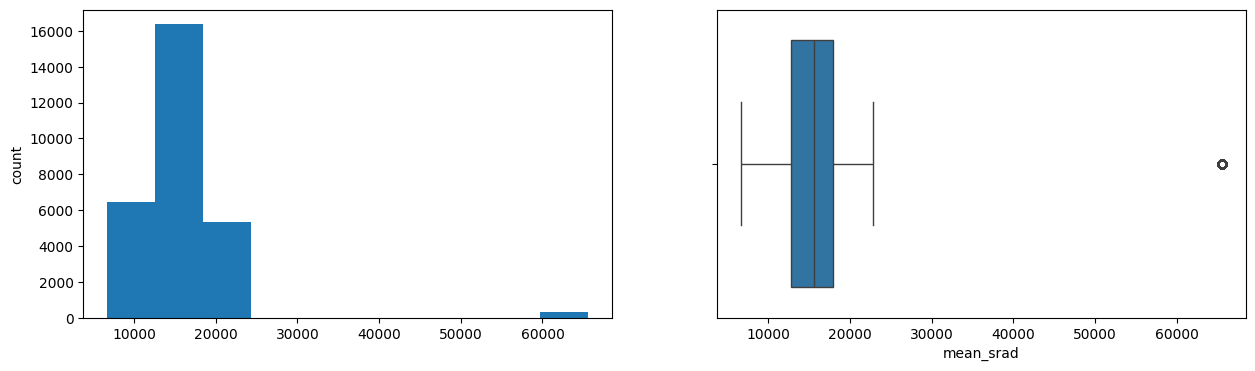

mean_wind
Skew : 0.44


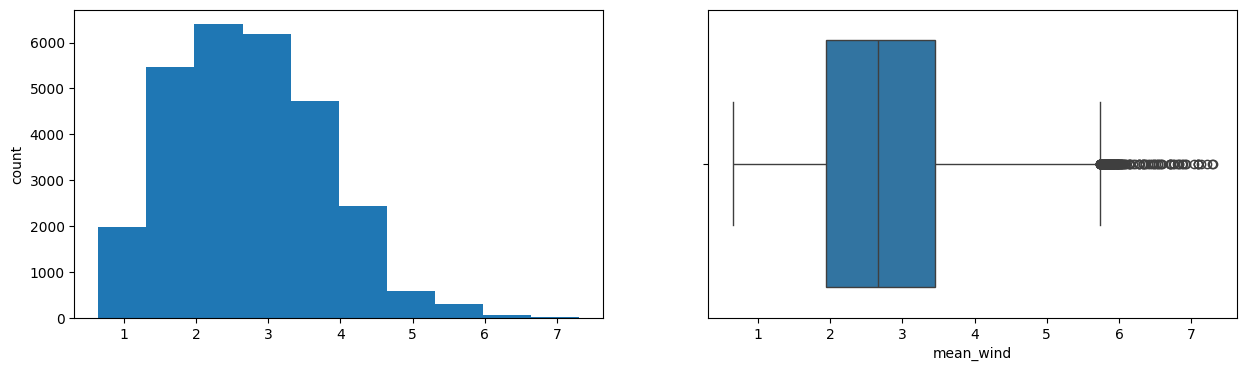

mean_vapr
Skew : 0.71


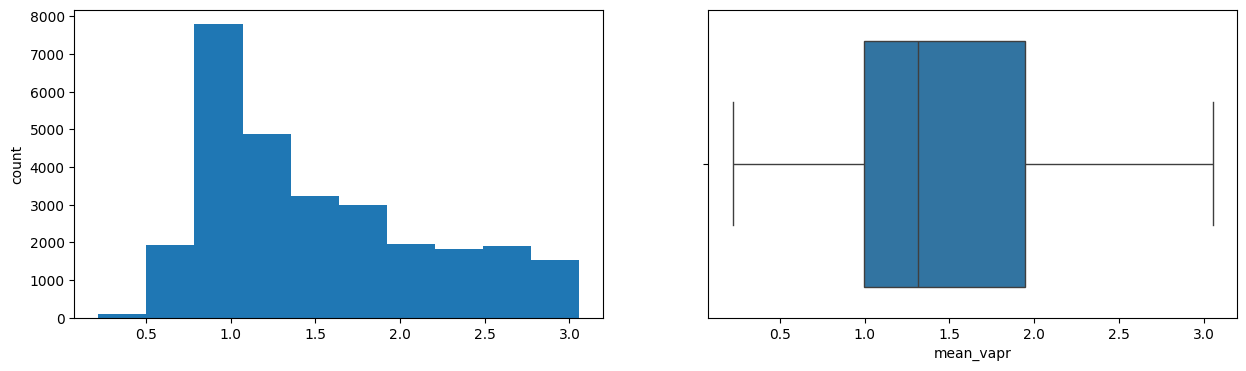

mean_tmin
Skew : -0.02


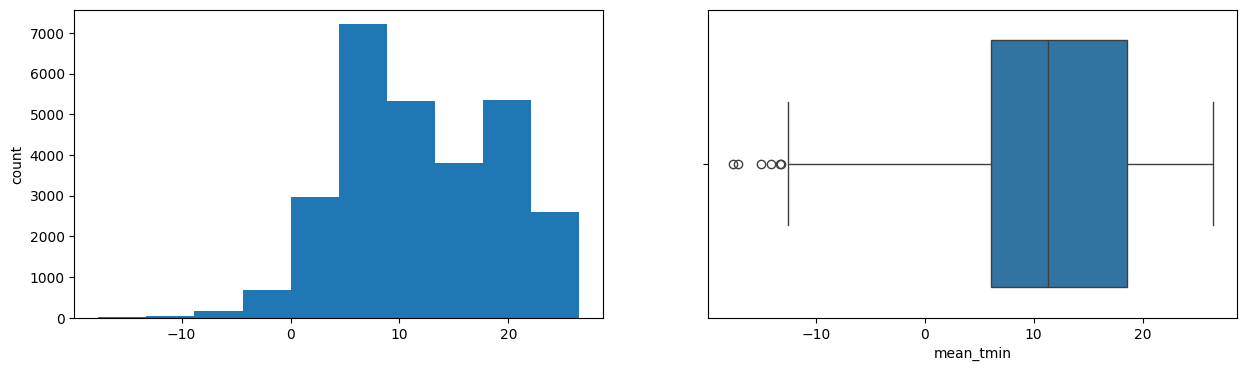

mean_tmax
Skew : -0.11


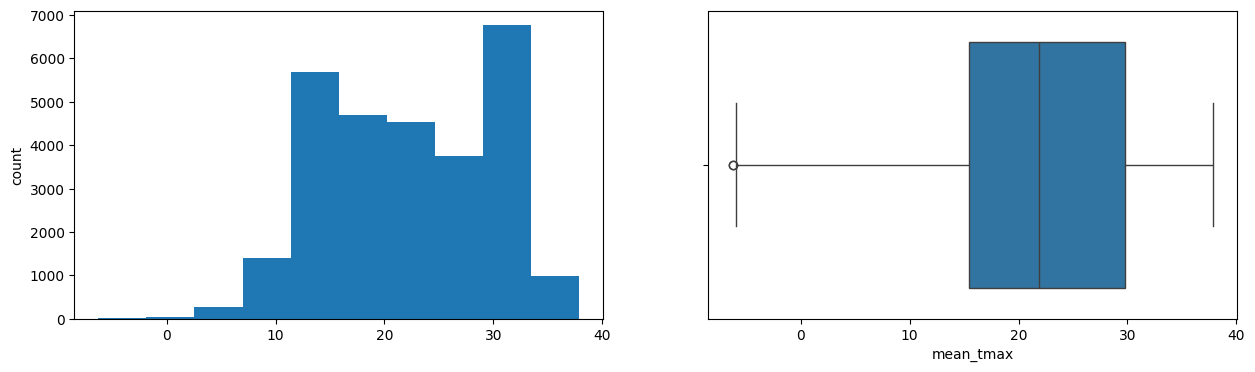

In [32]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    #checking for infinite values & replacing them with NaN
    data[col] = data[col].replace([np.inf, -np.inf], np.nan)

    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

In [33]:
# Function for log transformation of the column
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28438 entries, 0 to 28437
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   city_name      28438 non-null  object 
 1   latitude       28438 non-null  float64
 2   longitude      28438 non-null  float64
 3   elevation      28438 non-null  int64  
 4   mean_tavg      28129 non-null  float64
 5   mean_prec      28438 non-null  float64
 6   mean_srad      28438 non-null  float64
 7   mean_wind      28129 non-null  float64
 8   mean_vapr      28129 non-null  float64
 9   mean_tmin      28129 non-null  float64
 10  mean_tmax      28129 non-null  float64
 11  elevation_log  28022 non-null  float64
 12  mean_tavg_log  28000 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 2.8+ MB


<function matplotlib.pyplot.show(close=None, block=None)>

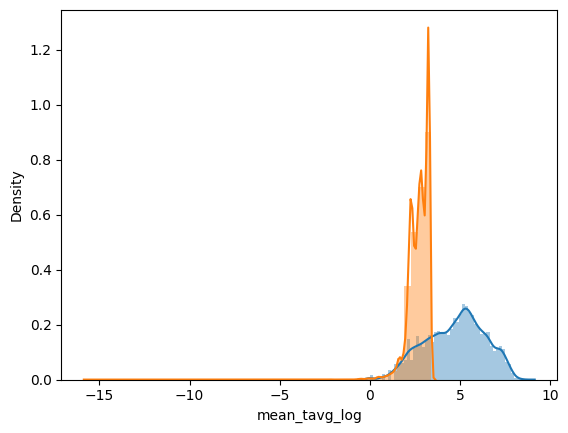

In [40]:
log_transform(data,['elevation','mean_tavg'])
data.replace([np.inf, -np.inf], np.nan, inplace=True)
sns.distplot(data["elevation_log"], axlabel="elevation_log");
sns.distplot(data["mean_tavg_log"], axlabel="mean_tavg_log");
plt.show

 **how does the elevation affect the wind?**

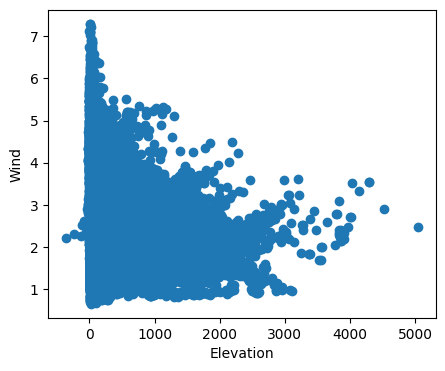

In [51]:
plt.figure(figsize=(5,4))
x = data['elevation']
y = data['mean_wind']
plt.scatter(x, y)
plt.xlabel('Elevation')
plt.ylabel('Wind')
plt.show()

**Relation between Temperature & Precipitation**




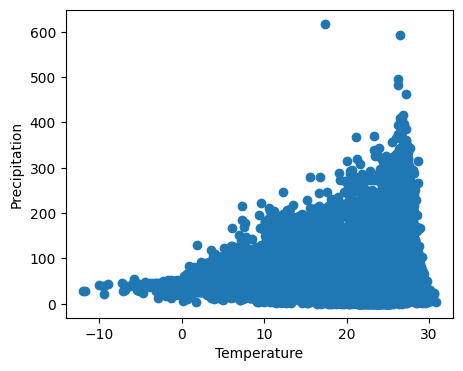

In [52]:
plt.figure(figsize=(5,4))
x = data['mean_tavg']
y = data['mean_prec']
plt.scatter(x, y)
plt.xlabel('Temperature')
plt.ylabel('Precipitation')
plt.show()